# Naive Bayes Algorithim

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
print(f'numpy version is : {np.__version__}')
print(f'pandas version is  :{pd.__version__}')
print(f'seaborn version is : {sns.__version__}')

numpy version is : 1.16.4
pandas version is  :0.24.2
seaborn version is : 0.9.0


In [4]:
# Load Data and display it 
data = pd.read_csv('Assets/data.csv')
print(f'data head is : {data.head()}')

data head is :             x           y  color
0  516.012706  393.014514      0
1  436.211762  408.656585      0
2  512.052601  372.022014      0
3  489.140464  401.807159      0
4  446.207986  338.516682      0


In [5]:
# Features and labels 
X = data[['x', 'y']]
y = data['color']

In [7]:
# train test split 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # to shuffle data 

In [8]:
# For this particular example we will be usinh Gaussian's Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [10]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(f'accuracy score is : {accuracy_score(y_test, y_pred)}')

accuracy score is : 0.9603960396039604


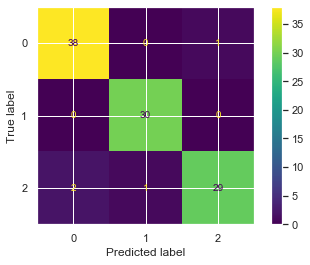

In [11]:
# Let's display the confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cm).plot()

In [12]:
# calculate rmse 
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(f'rmse value is : {rmse}')

rmse value is : 0.358765761029573


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)